1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Cargar la data

df = pd.read_csv("../data/usuarios_win_mac_lin.csv")
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [29]:
df.dtypes

duracion    float64
paginas       int64
acciones      int64
valor         int64
clase         int64
dtype: object

In [4]:
df.duracion.value_counts()

12.0     31
11.0     25
13.0     22
7.0       2
15.0      2
         ..
146.0     1
195.0     1
230.0     1
293.0     1
14.0      1
Name: duracion, Length: 87, dtype: int64

In [5]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


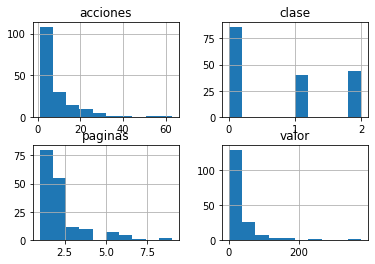

In [8]:
# visualizacion de los datos

df.drop(['duracion'], 1).hist()
plt.show()

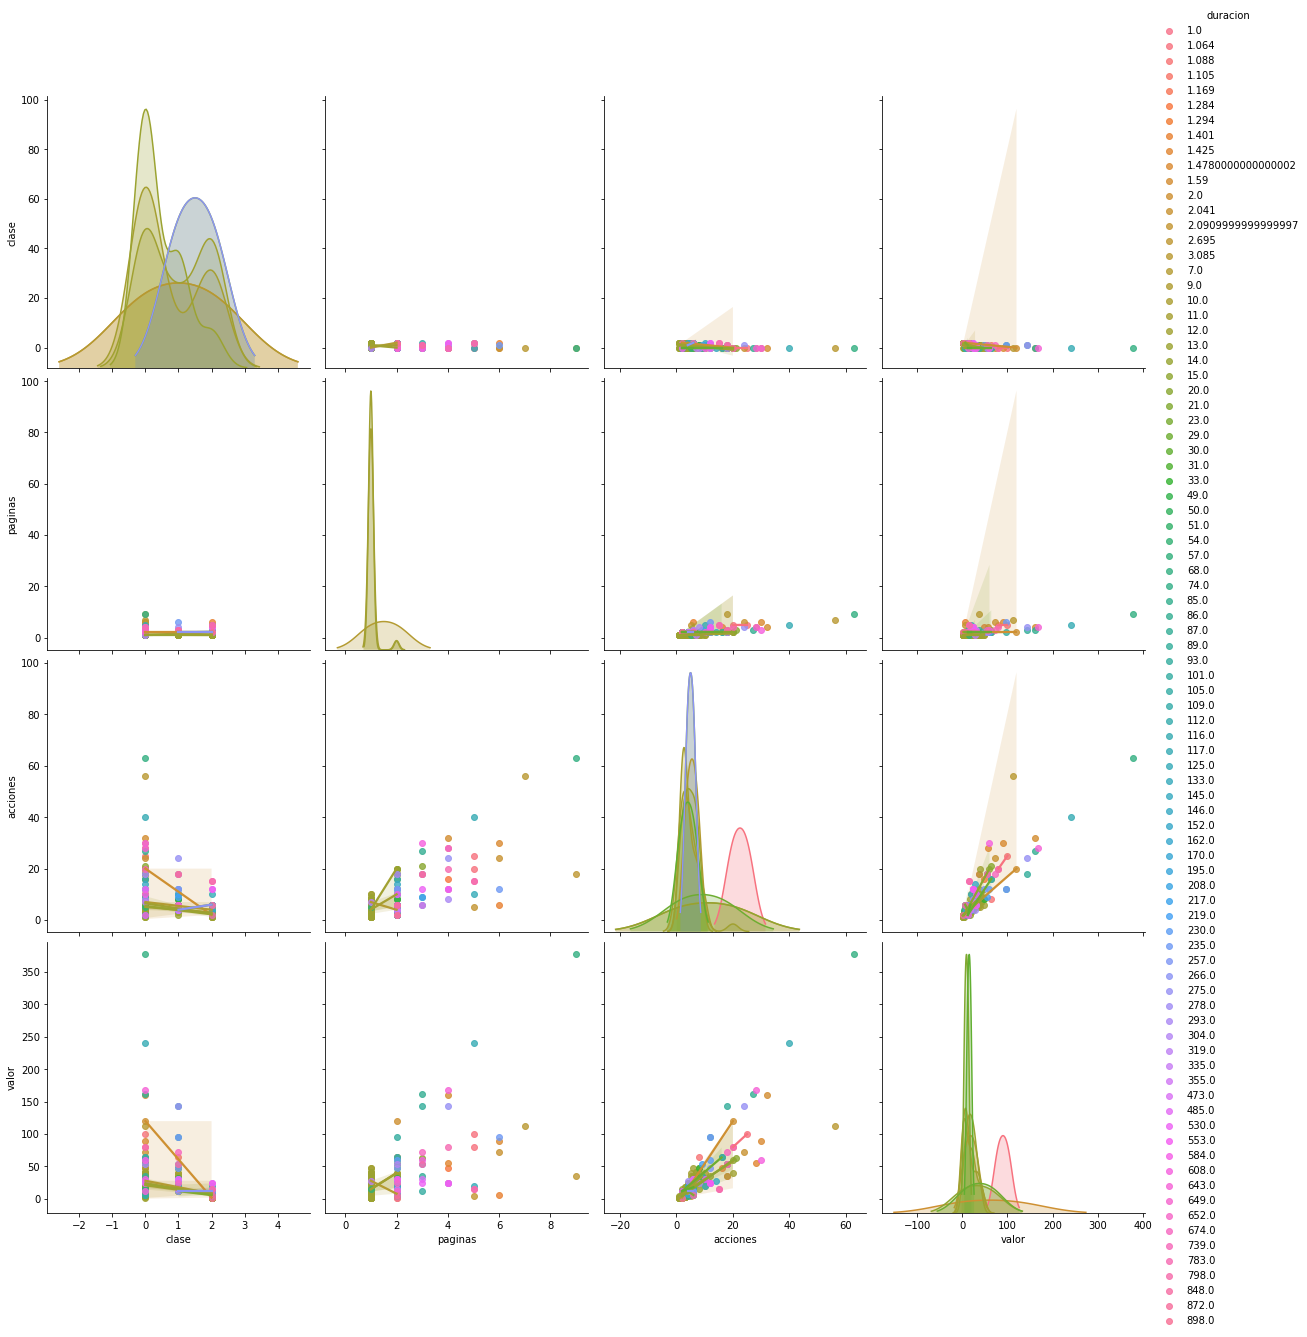

In [10]:
sb.pairplot(df.dropna(), hue='duracion',size=4,vars=["clase", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

In [13]:
X = np.array(df.drop(['duracion'],1))
X.shape

(170, 4)

In [27]:
y = np.array(df['duracion'])
y = y.astype(int)
y.shape

(170,)

In [33]:
model = linear_model.LogisticRegression()
print(model.fit(X,y))

LogisticRegression()


In [32]:
predictions = model.predict(X)
print(predictions)

[ 11  12  12  11  12   1  11  12  11  12  12   1   1 798  12  11   2  11
  13  12  11  89  12  11  12  13   2  12  11 643  11  13  11  11   1  11
  12 798  11   2  12  11  11  89  11  11   1  89  11   3 117  12  12   3
   1   1  13  12  12  68  13  68   1  13  12  68   3  13  13   1  12  12
   1   1   3  68  13   1   1   1   3   1   1   1   1   3  13  13  13   1
  12  12  13   1  13  12  11  12  11  12  12  11  12  12  12  11  12  12
  12  11  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
  12  12  12  12  13  13  13  13  12  12  12  13  13  12  13  13  12  13
  12  13  12  12  13  13  13  13  12  13  13  13  13  12  12  13  13  13
  13  13  12  13  13  13  12  12]


In [36]:
model.score(X,y)

0.2411764705882353

In [ ]:
# Validacion del modelo

In [37]:
validation_size = 0.20
seed = 5
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = validation_size, random_state = seed)

In [38]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.21428571 0.21428571 0.21428571 0.14285714 0.14285714 0.28571429
 0.30769231 0.07692308 0.23076923 0.23076923]
Logistic Regression: 0.206044 (0.065394)


In [39]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.08823529411764706


In [40]:
acierto = accuracy_score(y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 8.82 %
Error: 91.18 %


Reporte de Resultados   


In [42]:
y_test.shape

(34,)

In [43]:
print(confusion_matrix(y_test, predictions))

[[2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 

In [45]:
X_new = pd.DataFrame({'clase': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([11])